In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc

############
#INPUTS
#############

index = "BANKNIFTY"
index_file_path = "D:\BN data\BANKNIFTY.csv"
stfolder = "D:/Merged"
    
wgt_lot_path = "D:/Dispersion/Dispersion Data - 2021/BankNifty Weights/BN Mcap & includeok - Copy - Copy.csv"

direc = r"D:/Dispersion Backtest/Dispersion Working Files - 16.22 - Only Correlation 21-22"

output_path = r"D:/Dispersion backtest/Dispersion output files check - 16.22 - Only Correlation 21-22"

index_lotsize = 1

initial_equity = 100000

#########################
#Creating Stock List
#######################

filename = next(walk(stfolder), (None, None, []))[2]  # [] if no file
stock_list_path = []
for i in filename:
    temp = stfolder +"/"+ i
    stock_list_path.append(temp)

stock_list = []
for i in stock_list_path:
    stock_list.append(i.replace(".csv","").replace(stfolder + "/",""))
print(stock_list)
    
######################################    
#Creating weight and lot dictionary
######################################

"""wgtlot_df = pd.read_csv(wgt_lot_path)
wgtlot_dict = wgtlot_df.set_index('Symbol').T.to_dict('list')
print(wgtlot_dict)
symbols = list(wgtlot_dict.keys())"""

### Now adding Columns for weights below

####################################

lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = "expiry_dates.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date","curr_exp_month_week_number"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

['AUBANK', 'AXISBANK', 'BANDHANBNK', 'BANKBARODA', 'FEDERALBNK', 'HDFCBANK', 'ICICIBANK', 'IDFCFIRSTB', 'INDUSINDBK', 'KOTAKBANK', 'PNB', 'RBLBANK', 'SBIN']


In [2]:
idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('- I')]
df2 = idx[idx['Ticker'].str.endswith('- II')]
df3 = idx[idx['Ticker'].str.endswith('- III')]



index_file_path = direc + "/BANKNIFTY.csv"

df1.to_csv(index_file_path)
df2.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"))
df3.to_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-III"))

print(idx.shape[0])
print(df1.shape[0]+df2.shape[0]+df3.shape[0])
    
for i in stock_list:
    print(i)
    df = pd.read_csv(stfolder + '/' + i + ".csv",parse_dates = ["Date"],dayfirst = True)
    
    df1 = df[df['Ticker'].str.endswith('-I')]
    df2 = df[df['Ticker'].str.endswith('-II')]
    df3 = df[df['Ticker'].str.endswith('-III')]
    
    path = direc + '/' + i + ".csv"
    
    df1.to_csv(path)
    df2.to_csv(path.replace(i,i+"-II"))
    df3.to_csv(path.replace(i,i+"-III"))
    
    print(df.shape[0])
    print(df1.shape[0]+df2.shape[0]+df3.shape[0])

stfolder = direc
print(index_file_path)

255784
255784
AUBANK
12935
12935
AXISBANK
26561
26561
BANDHANBNK
20804
20804
BANKBARODA
23868
23868
FEDERALBNK
22403
22403
HDFCBANK
32005
32005
ICICIBANK
27816
27816
IDFCFIRSTB
21922
21922
INDUSINDBK
23092
23092
KOTAKBANK
25537
25537
PNB
17428
17428
RBLBANK
20325
20325
SBIN
39652
39652
D:/Dispersion Backtest/Dispersion Working Files - 16.22 - Only Correlation 21-22/BANKNIFTY.csv


In [3]:
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

print(final)
for i in stock_list:
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"])

    
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    print(df1.info())
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


    BANKNIFTY_Date_CE   BANKNIFTY_Ticker_CE BANKNIFTY_OPT_Close_CE  \
0          2021-01-01  BANKNIFTY31200CE - I                  923.7   
1          2021-01-04  BANKNIFTY31200CE - I                 900.95   
2          2021-01-05  BANKNIFTY31700CE - I                 895.85   
3          2021-01-06  BANKNIFTY31800CE - I                  872.7   
4          2021-01-07  BANKNIFTY32000CE - I                 809.65   
..                ...                   ...                    ...   
365        2022-06-24  BANKNIFTY33600CE - I                 419.35   
366        2022-06-27  BANKNIFTY33800CE - I                 358.65   
367        2022-06-28  BANKNIFTY33600CE - I                 301.55   
368        2022-06-29  BANKNIFTY33300CE - I                  196.8   
369        2022-06-30  BANKNIFTY33400CE - I                25.1016   

    BANKNIFTY_Strike_CE BANKNIFTY_IV_CE BANKNIFTY_EQ_Close_CE  \
0               31200.0          0.2522            31225.8496   
1               31200.0      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21284 entries, 0 to 21283
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        21284 non-null  datetime64[ns]
 1   Ticker                      21284 non-null  object        
 2   OPT_Close                   21284 non-null  float64       
 3   Strike                      21284 non-null  float64       
 4   Option_Type                 21284 non-null  object        
 5   IV                          21284 non-null  float64       
 6   EQ_Close                    21284 non-null  float64       
 7   At_The_Money                21284 non-null  float64       
 8   curr_exp_date               21284 non-null  datetime64[ns]
 9   curr_exp_month_week_number  10161 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 1.8+ MB
None
ICICIBANK
18219 368 368
<class 'pandas.core.fra

In [4]:
idx = pd.read_csv(index_file_path.replace("BANKNIFTY","BANKNIFTY-II"),usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"],parse_dates = ["Date"])


idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')


idx_ce = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["At_The_Money"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')
final.to_csv(output_path+"/check-3data.csv")

for i in stock_list:
    print(i)
    path  = stfolder+ '/' + i + ".csv"
    df1 = pd.read_csv(path.replace(i,i+"-II"),parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","At_The_Money"])
    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')

    
    df_ce = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["At_The_Money"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    
    
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
final = final.T.drop_duplicates().T
next_final_df = final.copy()

next_final_df.to_csv(output_path+"/check-4.0data.csv")


u = next_final_df.select_dtypes(exclude=['datetime'])
next_final_df[u.columns] = u.fillna(0)

next_final_df.to_csv(output_path+"/check-4data.csv")


AUBANK
AXISBANK
BANDHANBNK
BANKBARODA
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN


In [5]:
replacedf = curr_final_df[curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"]]
restdf = curr_final_df[~(curr_final_df[index + "_Date_CE"] == curr_final_df[index + "_curr_exp_date_CE"])]

nextdf = next_final_df[next_final_df[index + "_Date_CE"] == next_final_df[index + "_curr_exp_date_CE"]]

print(replacedf.shape[0])
print(restdf.shape[0])
print(nextdf.shape[0])
print(next_final_df.shape[0])


for i in symbols:
    if nextdf.shape[0] == replacedf.shape[0]:
        replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
        replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]
        print("EXCHANGE DONE")
    else:
        print("Entries Missing Error")
        break

final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])

18
352
18
370


<ipython-input-5-af3cdaa66d50>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_CE"] = nextdf[i+"_IV_CE"]
<ipython-input-5-af3cdaa66d50>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replacedf[i+"_IV_PE"] = nextdf[i+"_IV_PE"]


EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE
EXCHANGE DONE


<ipython-input-5-af3cdaa66d50>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = restdf.append(replacedf).sort_values(by=[index+"_Date_CE"]).reset_index().drop(columns = ["index"])


In [6]:
final.to_csv(output_path+"\Part-1data.csv")
data = pd.read_csv(output_path+"\Part-1data.csv",parse_dates = [index + "_Date_CE"],dayfirst = True)

In [7]:
#Adding Avg IV Columns
data[index + "_Avg IV"] = (data[index + "_IV_CE"] + data[index + "_IV_PE"])/2
curr_final_df[index + "_Avg IV"] = data[index + "_Avg IV"]
for i in stock_list:
    data[i + "_Avg IV"] = (data[i + "_IV_CE"] + data[i + "_IV_PE"])/2
    curr_final_df[i + "_Avg IV"] = data[i + "_Avg IV"]
data = curr_final_df.copy()

# Adding Weights Columns

In [8]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","includeok","Lotsize"])

In [9]:
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

<ipython-input-9-021f4af53298>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-9-021f4af53298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-9-021f4af53298>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

463
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


<ipython-input-9-021f4af53298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_curr_exp_month_week_number_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,BANKBARODA_OG_Weight,FEDERALBNK_OG_Weight,HDFCBANK_OG_Weight,ICICIBANK_OG_Weight,IDFCFIRSTB_OG_Weight,INDUSINDBK_OG_Weight,KOTAKBANK_OG_Weight,PNB_OG_Weight,RBLBANK_OG_Weight,SBIN_OG_Weight
0,2021-01-01,BANKNIFTY31200CE - I,923.7000,31200.0,0.2522,31225.8496,2021-01-28,1.0,BANKNIFTY31200PE - I,814.50,...,1.34,0.61,35.17,16.32,0.95,3.05,17.70,1.63,0.62,11.17
1,2021-01-04,BANKNIFTY31200CE - I,900.9500,31200.0,0.2646,31212.4492,2021-01-28,1.0,BANKNIFTY31200PE - I,777.45,...,1.36,0.63,35.00,16.47,0.98,3.05,17.47,1.67,0.64,11.26
2,2021-01-05,BANKNIFTY31700CE - I,895.8500,31700.0,0.2632,31722.2500,2021-01-28,1.0,BANKNIFTY31700PE - I,798.90,...,1.34,0.64,34.87,16.46,1.00,3.10,17.22,1.66,0.67,11.16
3,2021-01-06,BANKNIFTY31800CE - I,872.7000,31800.0,0.2656,31797.9004,2021-01-28,1.0,BANKNIFTY31800PE - I,772.85,...,1.34,0.64,34.63,16.71,1.04,3.09,17.27,1.63,0.70,11.26
4,2021-01-07,BANKNIFTY32000CE - I,809.6500,32000.0,0.2573,31956.0000,2021-01-28,1.0,BANKNIFTY32000PE - I,729.85,...,1.35,0.67,34.44,16.49,1.15,3.18,17.07,1.64,0.71,11.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-06-24,BANKNIFTY33600CE - I,419.3500,33600.0,0.2277,33627.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,372.80,...,2.11,0.77,30.63,20.21,0.79,2.55,13.73,1.33,NaN,16.51
366,2022-06-27,BANKNIFTY33800CE - I,358.6500,33800.0,0.2830,33811.2500,2022-06-30,0.0,BANKNIFTY33800PE - I,308.00,...,2.10,0.78,30.53,20.22,0.81,2.59,13.61,1.32,NaN,16.68
367,2022-06-28,BANKNIFTY33600CE - I,301.5500,33600.0,0.2770,33642.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,222.45,...,2.14,0.79,30.44,20.12,0.81,2.58,13.49,1.33,NaN,16.87
368,2022-06-29,BANKNIFTY33300CE - I,196.8000,33300.0,0.3012,33269.8984,2022-06-30,0.0,BANKNIFTY33300PE - I,211.90,...,2.15,0.79,30.71,20.11,0.81,2.58,13.41,1.35,NaN,16.86


### Adding Final Weight Columns

In [10]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [11]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_curr_exp_month_week_number_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,FEDERALBNK_Final_Weight,HDFCBANK_Final_Weight,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,BANKNIFTY_Final_Weight
0,2021-01-01,BANKNIFTY31200CE - I,923.7000,31200.0,0.2522,31225.8496,2021-01-28,1.0,BANKNIFTY31200PE - I,814.50,...,0.006099,0.351665,0.163184,0.009499,0.030497,0.176982,0.016298,0.006199,0.111689,1
1,2021-01-04,BANKNIFTY31200CE - I,900.9500,31200.0,0.2646,31212.4492,2021-01-28,1.0,BANKNIFTY31200PE - I,777.45,...,0.006301,0.350070,0.164733,0.009802,0.030506,0.174735,0.016703,0.006401,0.112623,1
2,2021-01-05,BANKNIFTY31700CE - I,895.8500,31700.0,0.2632,31722.2500,2021-01-28,1.0,BANKNIFTY31700PE - I,798.90,...,0.006399,0.348630,0.164567,0.009998,0.030994,0.172166,0.016597,0.006699,0.111578,1
3,2021-01-06,BANKNIFTY31800CE - I,872.7000,31800.0,0.2656,31797.9004,2021-01-28,1.0,BANKNIFTY31800PE - I,772.85,...,0.006400,0.346300,0.167100,0.010400,0.030900,0.172700,0.016300,0.007000,0.112600,1
4,2021-01-07,BANKNIFTY32000CE - I,809.6500,32000.0,0.2573,31956.0000,2021-01-28,1.0,BANKNIFTY32000PE - I,729.85,...,0.006700,0.344400,0.164900,0.011500,0.031800,0.170700,0.016400,0.007100,0.113400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-06-24,BANKNIFTY33600CE - I,419.3500,33600.0,0.2277,33627.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,372.80,...,0.007698,0.306239,0.202060,0.007898,0.025495,0.137273,0.013297,0.000000,0.165067,1
366,2022-06-27,BANKNIFTY33800CE - I,358.6500,33800.0,0.2830,33811.2500,2022-06-30,0.0,BANKNIFTY33800PE - I,308.00,...,0.007799,0.305269,0.202180,0.008099,0.025897,0.136086,0.013199,0.000000,0.166783,1
367,2022-06-28,BANKNIFTY33600CE - I,301.5500,33600.0,0.2770,33642.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,222.45,...,0.007899,0.304370,0.201180,0.008099,0.025797,0.134887,0.013299,0.000000,0.168683,1
368,2022-06-29,BANKNIFTY33300CE - I,196.8000,33300.0,0.3012,33269.8984,2022-06-30,0.0,BANKNIFTY33300PE - I,211.90,...,0.007900,0.307100,0.201100,0.008100,0.025800,0.134100,0.013500,0.000000,0.168600,1


In [12]:
data['index_iv'] = data[index +'_Avg IV']*100
data['stock_iv']  = 0
for i in stock_list:
    data['stock_iv'] += data[i + '_Avg IV']*data[i + "_Final_Weight"] 
    
data['implied_correl'] = (data['index_iv']/data['stock_iv'])

print(data.isnull().sum().sum())

94


<ipython-input-12-2324715696c9>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['index_iv'] = data[index +'_Avg IV']*100
<ipython-input-12-2324715696c9>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['stock_iv']  = 0
<ipython-input-12-2324715696c9>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

In [13]:
data['avg'] = data['implied_correl'].rolling(lookback_period).mean()
df = data.copy()

df.to_csv(output_path+'/impliedratio.csv')

<ipython-input-13-cb0553d5707b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['avg'] = data['implied_correl'].rolling(lookback_period).mean()


In [14]:
df = pd.read_csv(output_path+'/impliedratio.csv')

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * std_dev # Calculate top band
    bollinger_down = sma - std * std_dev # Calculate bottom band
    return bollinger_up, bollinger_down

df['bollinger_up'], df['bollinger_down'] = get_bollinger_bands(df['implied_correl'], lookback_period)

df['sma'] = get_sma(df['implied_correl'], lookback_period)
df['long_avg'] = df['implied_correl'].mean()


#print(df['bollinger_up'])
#print(df['bollinger_down'])
#print(df['long_avg'])
#print(df['sma'])

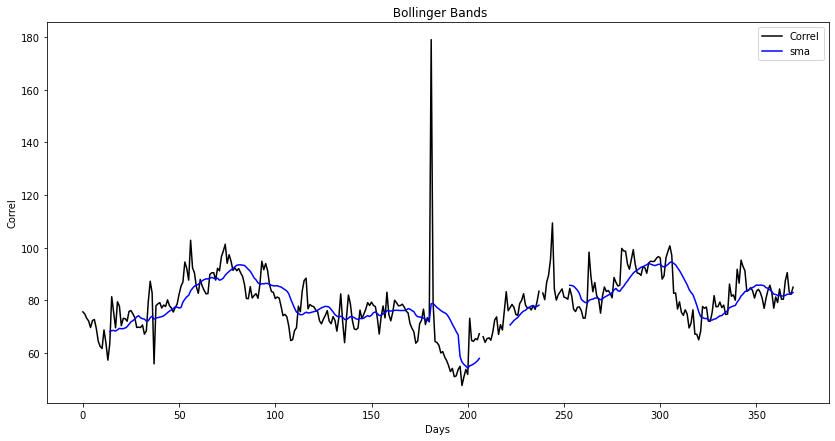

In [15]:
import matplotlib.pyplot as plt

df.head()

fig = plt.figure(figsize=(14,7))
plt.title(' Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Correl')
plt.plot(df['implied_correl'], label='Correl', c = 'black')
# plt.plot(df['bollinger_up'], label='Bollinger Up', c='g')
# plt.plot(df['bollinger_down'], label='Bollinger Down', c='r')
plt.plot(df['sma'], label='sma', c='b')

plt.legend()
plt.show()

In [16]:
df.to_csv(output_path+"\series.csv")

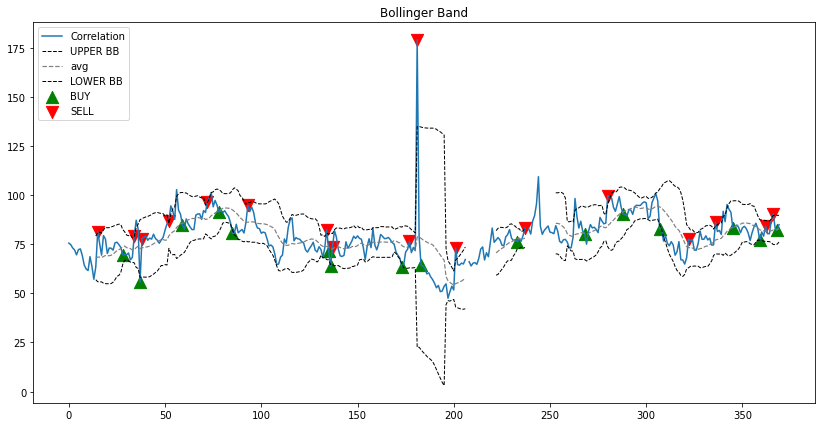

In [17]:
def implement_bb_strategy(data, lower_bb, upper_bb, avg):
    entry_ratio = []
    exit_ratio = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if(i==0):
            if data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            elif data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(0)
            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(0)
        else:
            if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
                if signal != 1:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] > avg[i-1] and data[i] < avg[i]:
                if signal != 0:
                    entry_ratio.append(data[i])
                    exit_ratio.append(np.nan)
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])                
            
            elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
                if signal != -1:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            elif data[i-1] < avg[i-1] and data[i] > avg[i]:
                if signal != 0:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(data[i])
                    signal = 0
                    bb_signal.append(signal)
                else:
                    entry_ratio.append(np.nan)
                    exit_ratio.append(np.nan)
                    bb_signal.append(bb_signal[i-1])

            else:
                entry_ratio.append(np.nan)
                exit_ratio.append(np.nan)
                bb_signal.append(bb_signal[i-1])

    return entry_ratio, exit_ratio, bb_signal

df['entry_ratio'], df['exit_ratio'], df['bb_signal'] = implement_bb_strategy(df['implied_correl'], df['bollinger_down'], df['bollinger_up'], df['avg'])

fig = plt.figure(figsize=(14,7))


df['implied_correl'].plot(label = 'Correlation', alpha = 1)
df['bollinger_up'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['avg'].plot(label = 'avg', linestyle = '--', linewidth = 1.2, color = 'grey')
df['bollinger_down'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, df['entry_ratio'], marker = '^', color = 'green', label = 'BUY', s = 150)
plt.scatter(df.index, df['exit_ratio'], marker = 'v', color = 'red', label = 'SELL', s = 150)
plt.title('Bollinger Band')
plt.legend(loc = 'upper left')
plt.show()


In [18]:
df1 = df.copy()

In [19]:
df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['BANKNIFTY_Date_CE']==x['BANKNIFTY_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i-1,'BANKNIFTY_Date_CE'] == df1.loc[i-1,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
    elif (df1.loc[i,'BANKNIFTY_Date_CE'] == df1.loc[i,'BANKNIFTY_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    else:
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

display(df1)          
    

,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_curr_exp_month_week_number_CE,BANKNIFTY_Ticker_PE,...,bollinger_down,sma,long_avg,entry_ratio,exit_ratio,bb_signal,dispersion_entry,dispersion_exit,correlation_entry,correlation_exit
0,0,2021-01-01,BANKNIFTY31200CE - I,923.7000,31200.0,0.2522,31225.8496,2021-01-28,1.0,BANKNIFTY31200PE - I,...,NaN,NaN,inf,NaN,NaN,1,False,False,True,False
1,1,2021-01-04,BANKNIFTY31200CE - I,900.9500,31200.0,0.2646,31212.4492,2021-01-28,1.0,BANKNIFTY31200PE - I,...,NaN,NaN,inf,NaN,NaN,1,False,False,False,False
2,2,2021-01-05,BANKNIFTY31700CE - I,895.8500,31700.0,0.2632,31722.2500,2021-01-28,1.0,BANKNIFTY31700PE - I,...,NaN,NaN,inf,NaN,NaN,1,False,False,False,False
3,3,2021-01-06,BANKNIFTY31800CE - I,872.7000,31800.0,0.2656,31797.9004,2021-01-28,1.0,BANKNIFTY31800PE - I,...,NaN,NaN,inf,NaN,NaN,1,False,False,False,False
4,4,2021-01-07,BANKNIFTY32000CE - I,809.6500,32000.0,0.2573,31956.0000,2021-01-28,1.0,BANKNIFTY32000PE - I,...,NaN,NaN,inf,NaN,NaN,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,365,2022-06-24,BANKNIFTY33600CE - I,419.3500,33600.0,0.2277,33627.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,...,75.826600,81.823759,inf,NaN,NaN,1,False,False,False,False
366,366,2022-06-27,BANKNIFTY33800CE - I,358.6500,33800.0,0.2830,33811.2500,2022-06-30,0.0,BANKNIFTY33800PE - I,...,74.830200,82.247210,inf,NaN,90.458836,1,False,False,False,False
367,367,2022-06-28,BANKNIFTY33600CE - I,301.5500,33600.0,0.2770,33642.4492,2022-06-30,0.0,BANKNIFTY33600PE - I,...,74.840134,82.265747,inf,NaN,NaN,1,False,False,False,False
368,368,2022-06-29,BANKNIFTY33300CE - I,196.8000,33300.0,0.3012,33269.8984,2022-06-30,0.0,BANKNIFTY33300PE - I,...,74.996283,82.368995,inf,82.207142,NaN,1,False,False,False,False


In [20]:
df2 = df1.copy()


# df2_index = df2.index
# exp_dates = list(df2_index[df2[index + "_curr_exp_date_CE"] == df2[index+"_Date_CE"]])
# print(exp_dates)
# for i in exp_dates:
#     if df2.iloc[i]["bb_signal"] == -1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = True
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = False
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]

#         df2.loc[i+1,'dispersion_entry'] = True
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = False
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = -1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
#     elif df2.iloc[i]["bb_signal"] == 1:
#         df2.loc[i,'dispersion_entry'] = False
#         df2.loc[i,'dispersion_exit'] = False
#         df2.loc[i,'correlation_entry'] = False
#         df2.loc[i,'correlation_exit'] = True
#         df2.loc[i,'bb_signal'] = 0
#         df2.loc[i,'entry_ratio'] = df2.iloc[i]["implied_correl"]
        
#         df2.loc[i+1,'dispersion_entry'] = False
#         df2.loc[i+1,'dispersion_exit'] = False
#         df2.loc[i+1,'correlation_entry'] = True
#         df2.loc[i+1,'correlation_exit'] = False
#         df2.loc[i+1,'bb_signal'] = 1
#         df2.loc[i+1,'exit_ratio'] = df2.iloc[i+1]["implied_correl"]
        
#     elif df2.iloc[i]["bb_signal"] == 0:
#         continue
        
# df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
#               (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [21]:
df = df2[ (df2["dispersion_entry"] == True) | (df2["correlation_exit"] == True) | 
              (df2["dispersion_exit"] == True) | (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '/with entry exit signals.csv')

In [22]:
trades = []

for i in df.index[:-1]:
    if df["bb_signal"][i] == -1:
        strikes = {}
        strikes[index] = df[index + "_Strike_CE"][i]
        for j in stock_list:
            strikes[j] = df[j+"_Strike_CE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "SILS",
                          "strike" : strikes,
                          "entry_ratio" : df["exit_ratio"][i],
                          "exit_ratio" : df["entry_ratio"][i+1],
                            
                        }
                      )
                            
    if df["bb_signal"][i] == 1:
            strikes = {}
            strikes[index] = df[index + "_Strike_CE"][i]
            for j in stock_list:
                strikes[j] = df[j+"_Strike_CE"][i]
            trades.append( 
                            { 
                              "entry_date": df[index + "_Date_CE"][i],
                              "exit_date" : df[index + "_Date_CE"][i+1],
                              "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                              "type_of_trade": "LISS",
                              "strike" : strikes,
                              "entry_ratio" : df["entry_ratio"][i],
                              "exit_ratio" : df["exit_ratio"][i+1],
                            }
                          )

In [23]:
for i in trades:
    date1 = i["entry_date"]
    date2 = i["exit_date"]
    expiry = i["expiry_date"]
    print(date1)
    print(date2)
    
    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])
        
        df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
        nextdf = nextdf.append(df)
        nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf

        for j in stock_list:
            print("#######################",j)
            print(i["strike"][j])
            path = stfolder + '/' + j + ".csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])
        
            df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][j])]
            nextdf = nextdf.append(df)
            nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
            df_dict[j] = nextdf
        i["dataframes"] = df_dict
    
    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][index])]
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df

        for j in stock_list:
            print("#######################",j)
            print(i["strike"][j])
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike"][j])]
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            df_dict[j] = df
        i["dataframes"] = df_dict

2021-01-01
2021-01-28
####################### AUBANK
0.0
####################### AXISBANK
620.0
####################### BANDHANBNK
400.0
####################### BANKBARODA
65.0
####################### FEDERALBNK
68.0
####################### HDFCBANK
1420.0
####################### ICICIBANK
530.0
####################### IDFCFIRSTB
37.0
####################### INDUSINDBK
900.0
####################### KOTAKBANK
2000.0
####################### PNB
35.0
####################### RBLBANK
230.0
####################### SBIN
280.0
2021-01-29
2021-02-25
####################### AUBANK
0.0
####################### AXISBANK
660.0
####################### BANDHANBNK
310.0
####################### BANKBARODA
68.0
####################### FEDERALBNK
72.0
####################### HDFCBANK
1400.0
####################### ICICIBANK
540.0
####################### IDFCFIRSTB
47.0
####################### INDUSINDBK
840.0
####################### KOTAKBANK
1720.0
####################### PNB
33.0
#######################

####################### IDFCFIRSTB
42.0
####################### INDUSINDBK
970.0
####################### KOTAKBANK
1780.0
####################### PNB
36.0
####################### RBLBANK
137.5
####################### SBIN
510.0
2022-04-29
2022-05-26
####################### AUBANK
700.0
####################### AXISBANK
730.0
####################### BANDHANBNK
335.0
####################### BANKBARODA
113.0
####################### FEDERALBNK
96.0
####################### HDFCBANK
1380.0
####################### ICICIBANK
740.0
####################### IDFCFIRSTB
40.0
####################### INDUSINDBK
980.0
####################### KOTAKBANK
1800.0
####################### PNB
35.0
####################### RBLBANK
120.0
####################### SBIN
495.0
2022-05-27
2022-06-30
####################### AUBANK
660.0
####################### AXISBANK
690.0
####################### BANDHANBNK
325.0
####################### BANKBARODA
97.5
####################### FEDERALBNK
87.0
####################### H

In [24]:
for i in trades:
    print(i["dataframes"]['BANKNIFTY'].columns)

Index(['Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low',
       'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV',
       'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low',
       'EQ_Close', 'At_The_Money', 'Delta_5_Strike', 'Delta_10_Strike',
       'Delta_15_Strike', 'Delta_20_Strike', 'Delta_25_Strike',
       'Delta_30_Strike', 'Delta_35_Strike', 'Delta_40_Strike',
       'Delta_45_Strike', 'Delta_50_Strike', 'curr_exp_date',
       'curr_exp_month_week_number'],
      dtype='object')
Index(['Unnamed: 0', 'Date', 'Ticker', 'OPT_Open', 'OPT_High', 'OPT_Low',
       'OPT_Close', 'OPT_Contracts', 'OPT_OI', 'Strike', 'Option_Type', 'IV',
       'Delta', 'Theta', 'Gamma', 'Vega', 'EQ_Open', 'EQ_High', 'EQ_Low',
       'EQ_Close', 'At_The_Money', 'Delta_5_Strike', 'Delta_10_Strike',
       'Delta_15_Strike', 'Delta_20_Strike', 'Delta_25_Strike',
       'Delta_30_Strike', 'Delta_35_Strike', 'Delta_40_Strike',
       'Delta_45_Strike', 

In [25]:
result = pd.DataFrame()
for trade_dict in trades:
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")

        temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
        temp = temp.T.drop_duplicates().T
        temp = temp.add_prefix(i +"_")
        
        final = final.merge(temp,left_on=index + '_Date_CE' , right_on= i + '_Date_CE', how = 'left')
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
        
result = result.T.drop_duplicates().T

<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(final)
<ipython-input-25-673fbd82d8c9>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(fi

In [26]:
data = result.copy()

In [27]:
display(data)

for i in stock_list:
    data[i+'_OPT_Close_PE'] = data[i+'_OPT_Close_PE'].fillna(method = 'ffill')
    data[i+'_OPT_Close_CE'] = data[i+'_OPT_Close_CE'].fillna(method = 'ffill')
    
data.to_csv(output_path + '/before_weigt_add_second_time.csv')

,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,BANKNIFTY_IV_PE,...,SBIN_OPT_Close_CE,SBIN_Strike_CE,SBIN_IV_CE,SBIN_EQ_Close_CE,SBIN_curr_exp_date_CE,SBIN_Ticker_PE,SBIN_OPT_Close_PE,SBIN_IV_PE,Trade_Type,D_marker
0,2021-01-01,BANKNIFTY31200CE - I,923.7,31200.0,0.2522,31225.8496,2021-01-28,BANKNIFTY31200PE - I,814.5,0.2616,...,12.1,280.0,0.3929,279.4,2021-01-28,SBIN280PE-I,11.7,0.394,LISS,F
1,2021-01-04,BANKNIFTY31200CE - I,900.95,31200.0,0.2646,31212.4492,2021-01-28,BANKNIFTY31200PE - I,777.45,0.2618,...,12.4,280.0,0.3981,281.05,2021-01-28,SBIN280PE-I,10.35,0.3952,LISS,M
2,2021-01-05,BANKNIFTY31200CE - I,1184.45,31200.0,0.2668,31722.25,2021-01-28,BANKNIFTY31200PE - I,584.7,0.2735,...,12.8,280.0,0.4078,281.75,2021-01-28,SBIN280PE-I,10.05,0.4035,LISS,M
3,2021-01-06,BANKNIFTY31200CE - I,1217.1,31200.0,0.2684,31797.9004,2021-01-28,BANKNIFTY31200PE - I,537.85,0.2725,...,14.15,280.0,0.397,285.05,2021-01-28,SBIN280PE-I,8.85,0.4188,LISS,M
4,2021-01-07,BANKNIFTY31200CE - I,1293.05,31200.0,0.2656,31956.0,2021-01-28,BANKNIFTY31200PE - I,419.25,0.2551,...,15.65,280.0,0.4016,287.7,2021-01-28,SBIN280PE-I,6.7,0.384,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,2022-06-24,BANKNIFTY35600CE - I,11.65,35600.0,0.2318,33627.4492,2022-06-30,BANKNIFTY35600PE - I,1973.05,0.2779,...,1.55,470.0,0.2777,454.25,2022-06-30,SBIN470PE-I,16.45,0.2458,LISS,M
21,2022-06-27,BANKNIFTY35600CE - I,8.5,35600.0,0.2875,33811.25,2022-06-30,BANKNIFTY35600PE - I,1786.45,0.3071,...,1.55,470.0,0.2755,461.2,2022-06-30,SBIN470PE-I,10.65,0.3128,LISS,M
22,2022-06-28,BANKNIFTY35600CE - I,4.55,35600.0,0.348,33642.4492,2022-06-30,BANKNIFTY35600PE - I,1949.4,0.3084,...,1.9,470.0,0.2983,464.25,2022-06-30,SBIN470PE-I,7.65,0.3091,LISS,M
23,2022-06-29,BANKNIFTY35600CE - I,2.35,35600.0,0.5304,33269.8984,2022-06-30,BANKNIFTY35600PE - I,2323.0,0.0,...,0.45,470.0,0.3591,459.1,2022-06-30,SBIN470PE-I,10.75,0.0,LISS,M


In [28]:
data = pd.read_csv(output_path + '/before_weigt_add_second_time.csv', parse_dates = ['BANKNIFTY_Date_CE'], dayfirst = True)

### Adding Weight and Lot Columns Again

In [29]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date","Lotsize"])

In [30]:


grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in stock_list:
    d1 = grp.get_group(i)
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[i + "_Lotsize"] = d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+ "_Lotsize"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time.csv')

<ipython-input-30-28d4f3247ca4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-30-28d4f3247ca4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_Lotsize"] = d1["Lotsize"]
<ipython-input-30-28d4f3247ca4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<ipython-input-30-28d4f3247ca4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]
<ipython-input-30-28d4f3247ca4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
<ipython-input-30-28d4f3247ca4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

3192
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


<ipython-input-30-28d4f3247ca4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[index+ "_Date_CE"] = d1["date"]


,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,INDUSINDBK_OG_Weight,INDUSINDBK_Lotsize,KOTAKBANK_OG_Weight,KOTAKBANK_Lotsize,PNB_OG_Weight,PNB_Lotsize,RBLBANK_OG_Weight,RBLBANK_Lotsize,SBIN_OG_Weight,SBIN_Lotsize
0,0,2021-01-01,BANKNIFTY31200CE - I,923.70,31200,0.2522,31225.8496,28-01-2021,BANKNIFTY31200PE - I,814.5000,...,3.05,1.0,17.70,1.0,1.63,1.0,0.62,1.0,11.17,1.0
1,1,2021-01-04,BANKNIFTY31200CE - I,900.95,31200,0.2646,31212.4492,28-01-2021,BANKNIFTY31200PE - I,777.4500,...,3.05,1.0,17.47,1.0,1.67,1.0,0.64,1.0,11.26,1.0
2,2,2021-01-05,BANKNIFTY31200CE - I,1184.45,31200,0.2668,31722.2500,28-01-2021,BANKNIFTY31200PE - I,584.7000,...,3.10,1.0,17.22,1.0,1.66,1.0,0.67,1.0,11.16,1.0
3,3,2021-01-06,BANKNIFTY31200CE - I,1217.10,31200,0.2684,31797.9004,28-01-2021,BANKNIFTY31200PE - I,537.8500,...,3.09,1.0,17.27,1.0,1.63,1.0,0.70,1.0,11.26,1.0
4,4,2021-01-07,BANKNIFTY31200CE - I,1293.05,31200,0.2656,31956.0000,28-01-2021,BANKNIFTY31200PE - I,419.2500,...,3.18,1.0,17.07,1.0,1.64,1.0,0.71,1.0,11.34,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20,2022-06-24,BANKNIFTY35600CE - I,11.65,35600,0.2318,33627.4492,30-06-2022,BANKNIFTY35600PE - I,1973.0500,...,2.55,1.0,13.73,1.0,1.33,1.0,0.00,0.0,16.51,1.0
366,21,2022-06-27,BANKNIFTY35600CE - I,8.50,35600,0.2875,33811.2500,30-06-2022,BANKNIFTY35600PE - I,1786.4500,...,2.59,1.0,13.61,1.0,1.32,1.0,0.00,0.0,16.68,1.0
367,22,2022-06-28,BANKNIFTY35600CE - I,4.55,35600,0.3480,33642.4492,30-06-2022,BANKNIFTY35600PE - I,1949.4000,...,2.58,1.0,13.49,1.0,1.33,1.0,0.00,0.0,16.87,1.0
368,23,2022-06-29,BANKNIFTY35600CE - I,2.35,35600,0.5304,33269.8984,30-06-2022,BANKNIFTY35600PE - I,2323.0000,...,2.58,1.0,13.41,1.0,1.35,1.0,0.00,0.0,16.86,1.0


### Adding Final Weight Columns

In [31]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [32]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"])
print(data["Min_Share_Name"])

data[filter_col] = data[filter_col].replace(np.nan,0)

['AUBANK_Final_Weight', 'AXISBANK_Final_Weight', 'BANDHANBNK_Final_Weight', 'BANKBARODA_Final_Weight', 'FEDERALBNK_Final_Weight', 'HDFCBANK_Final_Weight', 'ICICIBANK_Final_Weight', 'IDFCFIRSTB_Final_Weight', 'INDUSINDBK_Final_Weight', 'KOTAKBANK_Final_Weight', 'PNB_Final_Weight', 'RBLBANK_Final_Weight', 'SBIN_Final_Weight']
0      0.006099
1      0.006301
2      0.006399
3      0.006400
4      0.006700
         ...   
365    0.007698
366    0.007799
367    0.007899
368    0.007900
369    0.007799
Name: Min_Share_Value, Length: 370, dtype: float64
0      FEDERALBNK_Final_Weight
1      FEDERALBNK_Final_Weight
2      FEDERALBNK_Final_Weight
3      FEDERALBNK_Final_Weight
4      FEDERALBNK_Final_Weight
                ...           
365    FEDERALBNK_Final_Weight
366    FEDERALBNK_Final_Weight
367    FEDERALBNK_Final_Weight
368    FEDERALBNK_Final_Weight
369    FEDERALBNK_Final_Weight
Name: Min_Share_Name, Length: 370, dtype: object


In [33]:
display(data)
data.to_csv(output_path + '/before_qty_add.csv')

,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,ICICIBANK_Final_Weight,IDFCFIRSTB_Final_Weight,INDUSINDBK_Final_Weight,KOTAKBANK_Final_Weight,PNB_Final_Weight,RBLBANK_Final_Weight,SBIN_Final_Weight,BANKNIFTY_Final_Weight,Min_Share_Value,Min_Share_Name
0,0,2021-01-01,BANKNIFTY31200CE - I,923.70,31200,0.2522,31225.8496,28-01-2021,BANKNIFTY31200PE - I,814.5000,...,0.163184,0.009499,0.030497,0.176982,0.016298,0.006199,0.111689,1,0.006099,FEDERALBNK_Final_Weight
1,1,2021-01-04,BANKNIFTY31200CE - I,900.95,31200,0.2646,31212.4492,28-01-2021,BANKNIFTY31200PE - I,777.4500,...,0.164733,0.009802,0.030506,0.174735,0.016703,0.006401,0.112623,1,0.006301,FEDERALBNK_Final_Weight
2,2,2021-01-05,BANKNIFTY31200CE - I,1184.45,31200,0.2668,31722.2500,28-01-2021,BANKNIFTY31200PE - I,584.7000,...,0.164567,0.009998,0.030994,0.172166,0.016597,0.006699,0.111578,1,0.006399,FEDERALBNK_Final_Weight
3,3,2021-01-06,BANKNIFTY31200CE - I,1217.10,31200,0.2684,31797.9004,28-01-2021,BANKNIFTY31200PE - I,537.8500,...,0.167100,0.010400,0.030900,0.172700,0.016300,0.007000,0.112600,1,0.006400,FEDERALBNK_Final_Weight
4,4,2021-01-07,BANKNIFTY31200CE - I,1293.05,31200,0.2656,31956.0000,28-01-2021,BANKNIFTY31200PE - I,419.2500,...,0.164900,0.011500,0.031800,0.170700,0.016400,0.007100,0.113400,1,0.006700,FEDERALBNK_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20,2022-06-24,BANKNIFTY35600CE - I,11.65,35600,0.2318,33627.4492,30-06-2022,BANKNIFTY35600PE - I,1973.0500,...,0.202060,0.007898,0.025495,0.137273,0.013297,0.000000,0.165067,1,0.007698,FEDERALBNK_Final_Weight
366,21,2022-06-27,BANKNIFTY35600CE - I,8.50,35600,0.2875,33811.2500,30-06-2022,BANKNIFTY35600PE - I,1786.4500,...,0.202180,0.008099,0.025897,0.136086,0.013199,0.000000,0.166783,1,0.007799,FEDERALBNK_Final_Weight
367,22,2022-06-28,BANKNIFTY35600CE - I,4.55,35600,0.3480,33642.4492,30-06-2022,BANKNIFTY35600PE - I,1949.4000,...,0.201180,0.008099,0.025797,0.134887,0.013299,0.000000,0.168683,1,0.007899,FEDERALBNK_Final_Weight
368,23,2022-06-29,BANKNIFTY35600CE - I,2.35,35600,0.5304,33269.8984,30-06-2022,BANKNIFTY35600PE - I,2323.0000,...,0.201100,0.008100,0.025800,0.134100,0.013500,0.000000,0.168600,1,0.007900,FEDERALBNK_Final_Weight


In [34]:
#ADDING QTYS
result = data.copy()
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

['AUBANK_Lotsize', 'AXISBANK_Lotsize', 'BANDHANBNK_Lotsize', 'BANKBARODA_Lotsize', 'FEDERALBNK_Lotsize', 'HDFCBANK_Lotsize', 'ICICIBANK_Lotsize', 'IDFCFIRSTB_Lotsize', 'INDUSINDBK_Lotsize', 'KOTAKBANK_Lotsize', 'PNB_Lotsize', 'RBLBANK_Lotsize', 'SBIN_Lotsize']
['AUBANK_EQ_Close_CE', 'AXISBANK_EQ_Close_CE', 'BANDHANBNK_EQ_Close_CE', 'BANKBARODA_EQ_Close_CE', 'FEDERALBNK_EQ_Close_CE', 'HDFCBANK_EQ_Close_CE', 'ICICIBANK_EQ_Close_CE', 'IDFCFIRSTB_EQ_Close_CE', 'INDUSINDBK_EQ_Close_CE', 'KOTAKBANK_EQ_Close_CE', 'PNB_EQ_Close_CE', 'RBLBANK_EQ_Close_CE', 'SBIN_EQ_Close_CE']
AUBANK
AXISBANK
BANDHANBNK
BANKBARODA
FEDERALBNK
HDFCBANK
ICICIBANK
IDFCFIRSTB
INDUSINDBK
KOTAKBANK
PNB
RBLBANK
SBIN


In [35]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin'])

result.to_csv(output_path+"/final2.csv")

In [36]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [37]:
result = result.ffill()

In [38]:
display(result)

,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,BANKBARODA_qty_final,FEDERALBNK_qty_final,HDFCBANK_qty_final,ICICIBANK_qty_final,IDFCFIRSTB_qty_final,INDUSINDBK_qty_final,KOTAKBANK_qty_final,PNB_qty_final,RBLBANK_qty_final,SBIN_qty_final
0,0,2021-01-01,BANKNIFTY31200CE - I,923.70,31200,0.2522,31225.8496,28-01-2021,BANKNIFTY31200PE - I,814.5000,...,51.932791,22.407752,61.693420,77.338238,63.496324,8.469963,22.188799,117.085993,6.707834,99.936320
1,1,2021-01-04,BANKNIFTY31200CE - I,900.95,31200,0.2646,31212.4492,28-01-2021,BANKNIFTY31200PE - I,777.4500,...,51.932791,22.407752,61.693420,77.338238,63.496324,8.469963,22.188799,117.085993,6.707834,99.936320
2,2,2021-01-05,BANKNIFTY31200CE - I,1184.45,31200,0.2668,31722.2500,28-01-2021,BANKNIFTY31200PE - I,584.7000,...,51.932791,22.407752,61.693420,77.338238,63.496324,8.469963,22.188799,117.085993,6.707834,99.936320
3,3,2021-01-06,BANKNIFTY31200CE - I,1217.10,31200,0.2684,31797.9004,28-01-2021,BANKNIFTY31200PE - I,537.8500,...,51.932791,22.407752,61.693420,77.338238,63.496324,8.469963,22.188799,117.085993,6.707834,99.936320
4,4,2021-01-07,BANKNIFTY31200CE - I,1293.05,31200,0.2656,31956.0000,28-01-2021,BANKNIFTY31200PE - I,419.2500,...,51.932791,22.407752,61.693420,77.338238,63.496324,8.469963,22.188799,117.085993,6.707834,99.936320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20,2022-06-24,BANKNIFTY35600CE - I,11.65,35600,0.2318,33627.4492,30-06-2022,BANKNIFTY35600PE - I,1973.0500,...,49.928967,20.140104,53.523545,67.018056,59.696981,7.456981,19.141776,105.921922,0.000000,86.051893
366,21,2022-06-27,BANKNIFTY35600CE - I,8.50,35600,0.2875,33811.2500,30-06-2022,BANKNIFTY35600PE - I,1786.4500,...,49.928967,20.140104,53.523545,67.018056,59.696981,7.456981,19.141776,105.921922,0.000000,86.051893
367,22,2022-06-28,BANKNIFTY35600CE - I,4.55,35600,0.3480,33642.4492,30-06-2022,BANKNIFTY35600PE - I,1949.4000,...,49.928967,20.140104,53.523545,67.018056,59.696981,7.456981,19.141776,105.921922,0.000000,86.051893
368,23,2022-06-29,BANKNIFTY35600CE - I,2.35,35600,0.5304,33269.8984,30-06-2022,BANKNIFTY35600PE - I,2323.0000,...,49.928967,20.140104,53.523545,67.018056,59.696981,7.456981,19.141776,105.921922,0.000000,86.051893


In [39]:
plvalue = []
pl = 0

for idi, row in result.iterrows():
    pval = 0
    if row["D_marker"] == "F":

        result.loc[idi, 'pl_check'] = pl + initial_equity
        result.loc[idi+1:, 'pl_check'] = np.nan

        result.loc[idi , 'units_new'] = ((result.loc[idi ,'pl_check'])/result.loc[idi, 'margin'])
        result.loc[idi+1: , 'units_new'] = np.nan
       
        result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
        result.loc[idi+1:, index + '_qty_final'] = np.nan
        
        result.loc[idi, 'plvalue_' + index] = 0

        for i in stock_list:                                                                    
            result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, i + '_qty_final'] = np.nan
            result.loc[idi, 'plvalue_' + i] = 0
        
        result = result.ffill()

        
    else:
            if row["Trade_Type"] == "SILS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] - result.loc[idi, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_PE"] - result.loc[idi, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] - result.loc[idi-1, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_PE"] - result.loc[idi-1, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
                    
            if row["Trade_Type"] == "LISS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe
                
                for i in stock_list:
                    plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
                    plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
                    pval += plvalce + plvalpe

                    result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 
            
            pl += pval
        
        
    plvalue.append(pval)

result["Daily_PL"] = plvalue

result.to_csv(output_path+"\pl_final4.csv")


In [40]:
result.loc[0,'Daily_PL'] = initial_equity
result["PortfolioValue"] = result["Daily_PL"].cumsum()
result.loc[0,'Daily_PL'] = 0

display(result)

,Unnamed: 0,BANKNIFTY_Date_CE,BANKNIFTY_Ticker_CE,BANKNIFTY_OPT_Close_CE,BANKNIFTY_Strike_CE,BANKNIFTY_IV_CE,BANKNIFTY_EQ_Close_CE,BANKNIFTY_curr_exp_date_CE,BANKNIFTY_Ticker_PE,BANKNIFTY_OPT_Close_PE,...,plvalue_HDFCBANK,plvalue_ICICIBANK,plvalue_IDFCFIRSTB,plvalue_INDUSINDBK,plvalue_KOTAKBANK,plvalue_PNB,plvalue_RBLBANK,plvalue_SBIN,Daily_PL,PortfolioValue
0,0,2021-01-01,BANKNIFTY31200CE - I,923.70,31200,0.2522,31225.8496,28-01-2021,BANKNIFTY31200PE - I,814.5000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000
1,1,2021-01-04,BANKNIFTY31200CE - I,900.95,31200,0.2646,31212.4492,28-01-2021,BANKNIFTY31200PE - I,777.4500,...,166.572234,154.676475,-1.421085e-14,14.398938,-23.298239,0.000000,0.335392,104.933136,-14.708108,99985.291892
2,2,2021-01-05,BANKNIFTY31200CE - I,1184.45,31200,0.2668,31722.2500,28-01-2021,BANKNIFTY31200PE - I,584.7000,...,-123.386840,-189.478682,-2.857335e+01,-46.584799,-35.502079,23.417199,-30.856036,-9.993632,-219.930698,99765.361194
3,3,2021-01-06,BANKNIFTY31200CE - I,1217.10,31200,0.2684,31797.9004,28-01-2021,BANKNIFTY31200PE - I,537.8500,...,-86.370788,30.935295,-1.206430e+02,46.584799,159.759356,-17.562899,-43.936312,-14.990448,56.712535,99822.073730
4,4,2021-01-07,BANKNIFTY31200CE - I,1293.05,31200,0.2656,31956.0000,28-01-2021,BANKNIFTY31200PE - I,419.2500,...,209.757628,166.277211,-1.904890e+02,-38.961832,-13.313280,23.417199,-41.923962,64.958608,-354.686884,99467.386846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,20,2022-06-24,BANKNIFTY35600CE - I,11.65,35600,0.2318,33627.4492,30-06-2022,BANKNIFTY35600PE - I,1973.0500,...,888.920249,1030.590184,2.670569e+01,327.336296,763.191018,35.538458,0.000000,336.837124,137.938204,113861.793177
366,21,2022-06-27,BANKNIFTY35600CE - I,8.50,35600,0.2875,33811.2500,30-06-2022,BANKNIFTY35600PE - I,1786.4500,...,161.621864,288.565252,1.001463e+02,164.710620,-7.492759,23.692306,0.000000,558.187234,-145.987521,113715.805656
367,22,2022-06-28,BANKNIFTY35600CE - I,4.55,35600,0.3480,33642.4492,30-06-2022,BANKNIFTY35600PE - I,1949.4000,...,-263.383778,-400.993272,-3.338211e+00,-55.876514,0.000000,23.692306,0.000000,255.033823,819.419610,114535.225266
368,23,2022-06-29,BANKNIFTY35600CE - I,2.35,35600,0.5304,33269.8984,30-06-2022,BANKNIFTY35600PE - I,2323.0000,...,-422.012644,-637.092114,-1.335285e+01,-47.953725,-802.795601,23.692306,0.000000,-158.794644,160.060189,114695.285455


No handles with labels found to put in legend.


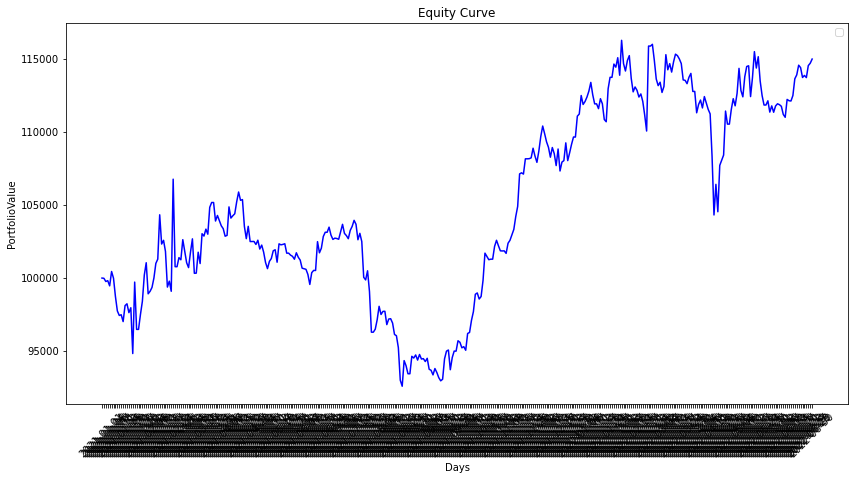

In [41]:
result.to_csv(output_path+"/final4.1.csv")

fig = plt.figure(figsize=(14,7))
plt.title('Equity Curve')
plt.xlabel('Days')
plt.ylabel('PortfolioValue')
plt.plot((result["BANKNIFTY_Date_CE"]).astype('str'),result['PortfolioValue'], c = 'blue')

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [42]:
### Calculate CAGR 

df = result.copy()
from pyxirr import xirr

firstValue = round(df.loc[0, 'PortfolioValue'],4)
lastValue = round(df.loc[df.index[-1], 'PortfolioValue'],4)

firstDate = (df.loc[0, 'BANKNIFTY_Date_CE'])
lastDate = (df.loc[df.index[-1], 'BANKNIFTY_Date_CE'])

dates = [firstDate, lastDate]
amounts = [-firstValue, lastValue]

xirr = xirr(dates, amounts)

print(xirr)
### Calculate Daily Drawdown

Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0


#Roll_Max[0:50], Daily_Drawdown[0:50]

df['Daily_Drawdown'] = Daily_Drawdown * 100

print("max dd", min(df['Daily_Drawdown']))

df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

### Monthly PNL Percentage 

df['BANKNIFTY_Date_CE'] = pd.to_datetime(df['BANKNIFTY_Date_CE'], dayfirst=True)

df['Year'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).year
df['Month'] = pd.DatetimeIndex(df['BANKNIFTY_Date_CE']).month
df.to_csv(output_path + '/df.csv', index=False)

i = 0
dfg = df.groupby(['Year', 'Month'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)
    
i = 0
dfg = df.groupby(['Year'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Yearly'] = change * 100
    
df

df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
df1 = df1.drop_duplicates()
df1

pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                         columns =['Month'])
pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

pivotTable.index

def _color_red_or_green(val):
    color = '#EE0000' if val < 0 else '#00EE00'
    return 'background-color: %s' % color
pivotTable.style.applymap(_color_red_or_green)




0.09801486909594766
max dd -13.268468980157133


,,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,Change_%_Yearly,,,,,,,,,,,,
2021,9.648374,-3.510000,4.450000,3.100000,-1.350000,-0.910000,1.060000,-6.180000,-1.830000,0.500000,6.620000,6.840000,1.320000
2022,4.865347,4.550000,1.180000,-2.780000,-1.980000,0.740000,3.260000,nan,nan,nan,nan,nan,nan


In [ ]:
data = pd.read_csv(output_path + '/before_weigt_add_second_time.csv')

for i in stock_list:
    data[i+'_OPT_Close_PE'] = data[i+'_OPT_Close_PE'].fillna(method = 'ffill')
    data[i+'_OPT_Close_CE'] = data[i+'_OPT_Close_CE'].fillna(method = 'ffill')
    
data.to_csv(output_path + '/before_weigt_add_second_timexxx.csv')